In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Book1 (version 1) - Copy.xlsx", skiprows=2)
df

,Dataset,Disease,Total_samples,Healthy_samples,Disease_samples,Tissue,Cell_type,Data type
0,GSE10325 T cells,SLE,22,9,13,Peripheral blood,T cells,Expression
1,GSE10325 B cells,SLE,23,9,14,Peripheral blood,B cells,Expression
2,GSE10325 Myeloid cells,SLE,21,10,11,Peripheral blood,Myeloid cells,Expression
3,GSE104174,SSc,72,15,57,Whole blood,Macrophages,Expression
4,GSE110007,SjS,29,14,15,Salivary gland,NaN,Methylation
...,...,...,...,...,...,...,...,...
77,GSE112341,T1D,22,10,12,Peripheral blood,Memory effector T cells,Expression
78,GSE110914,T1D,21,16,5,Peripheral blood,Neutrophils,Expression
79,GSE124073,SSc,73,18,55,Peripheral blood,Monocytes,Expression
80,GSE117931 GPL14951,SSc,37,19,18,Whole blood,PBMCs,Expression


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Dataset          82 non-null     object
 1   Disease          82 non-null     object
 2   Total_samples    82 non-null     int64 
 3   Healthy_samples  82 non-null     int64 
 4   Disease_samples  82 non-null     int64 
 5   Tissue           79 non-null     object
 6   Cell_type        59 non-null     object
 7   Data type        82 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.2+ KB


In [4]:
df.isna().sum()

Dataset             0
Disease             0
Total_samples       0
Healthy_samples     0
Disease_samples     0
Tissue              3
Cell_type          23
Data type           0
dtype: int64

In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols

Index(['Total_samples', 'Healthy_samples', 'Disease_samples'], dtype='object')

In [6]:
categorical_cols = df.select_dtypes(include='object').columns[1:-1]
categorical_cols

Index(['Disease', 'Tissue', 'Cell_type'], dtype='object')

In [7]:
target_column = "Data type"

In [8]:
df[categorical_cols].nunique()

Disease       5
Tissue        7
Cell_type    19
dtype: int64

In [9]:
df[categorical_cols].isna().sum()

Disease       0
Tissue        3
Cell_type    23
dtype: int64

In [10]:
df[numerical_cols].isna().sum()

Total_samples      0
Healthy_samples    0
Disease_samples    0
dtype: int64

<Axes: xlabel='Total_samples', ylabel='Count'>

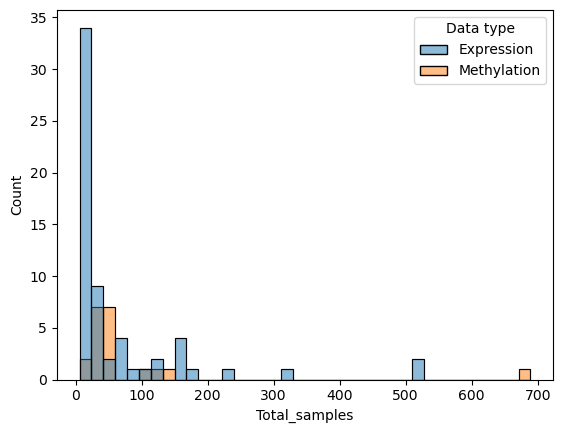

In [11]:
sns.histplot(df,x='Total_samples', hue='Data type')

<Axes: xlabel='Data type', ylabel='Count'>

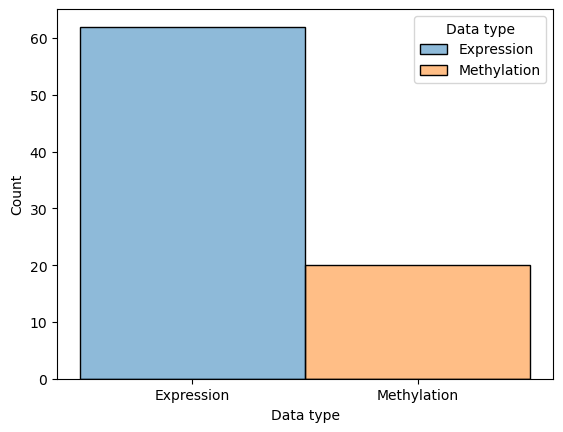

In [12]:
sns.histplot(df,x='Data type', hue='Data type')

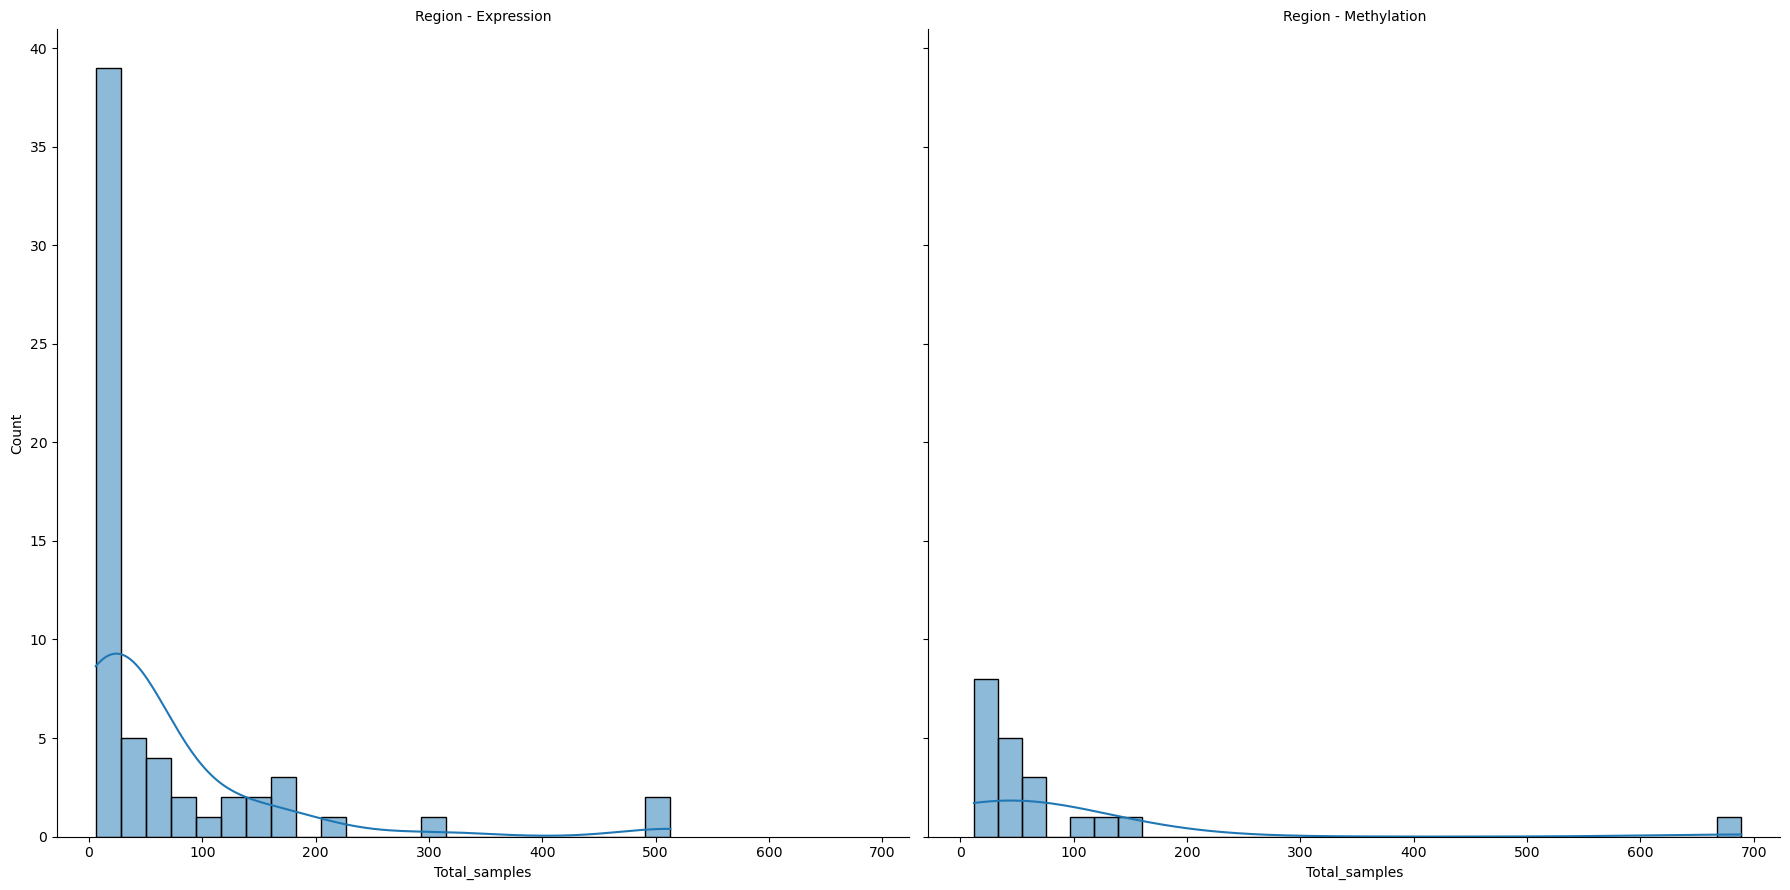

In [13]:
g = sns.FacetGrid(df, col='Data type', col_wrap=2, height=9)


g.map(sns.histplot, 'Total_samples', kde=True)

# Set titles for each subplot
g.set_titles("Region - {col_name}", fontsize=20)

plt.show()

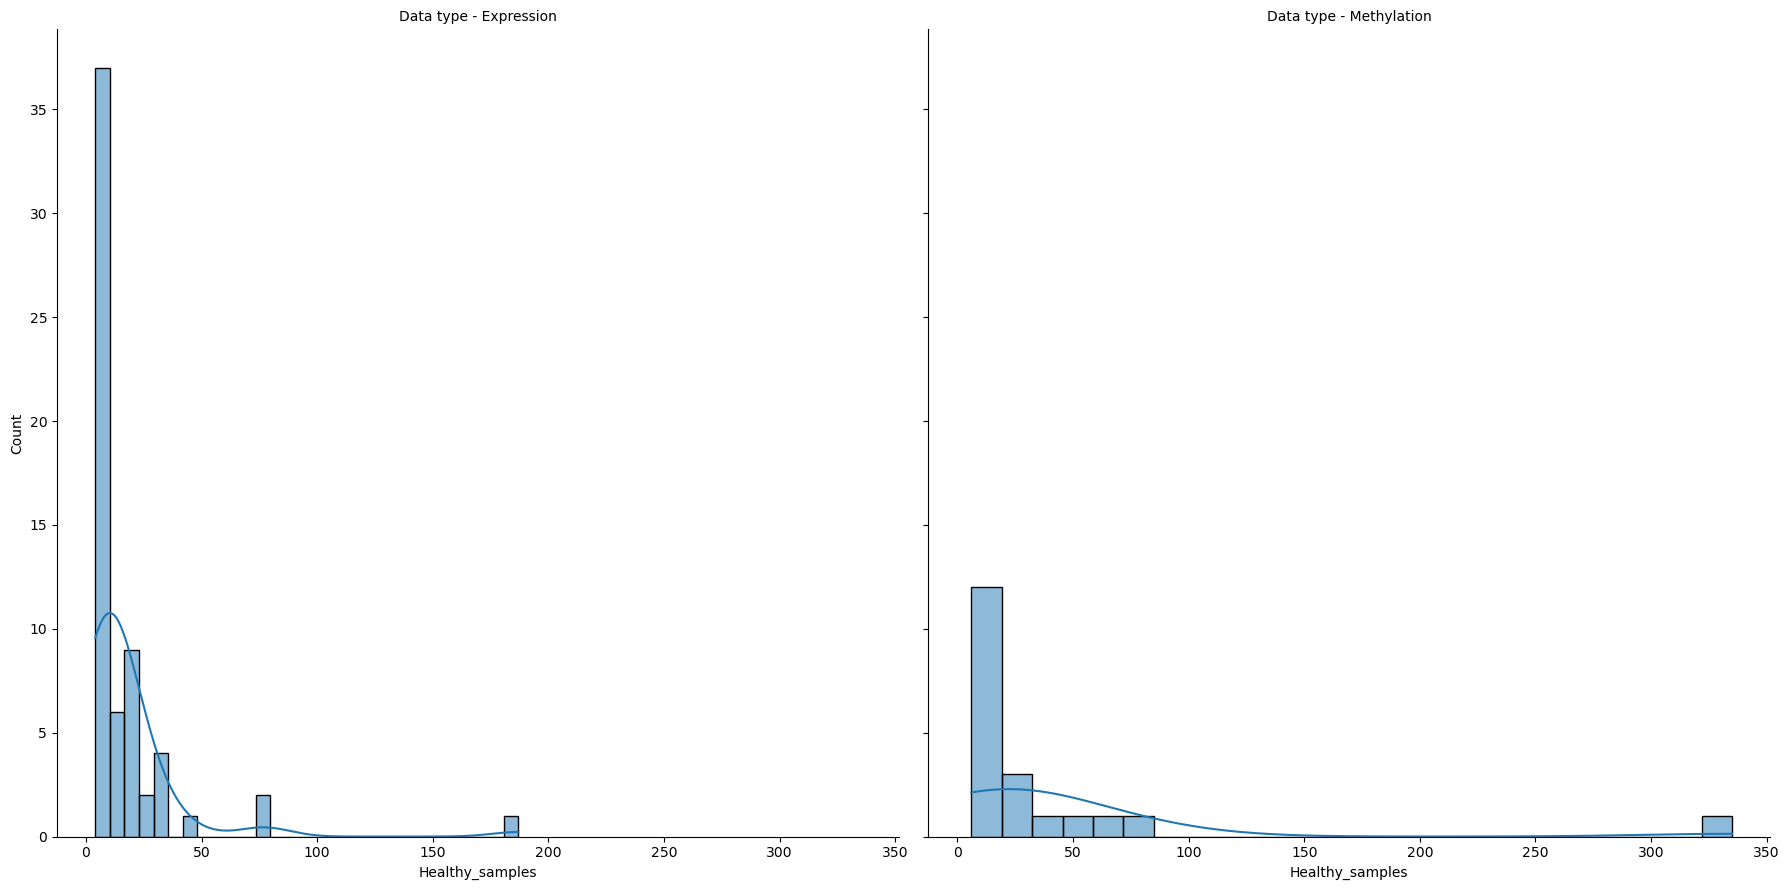

In [14]:
g = sns.FacetGrid(df, col='Data type', col_wrap=2, height=9)


g.map(sns.histplot, 'Healthy_samples', kde=True)

# Set titles for each subplot
g.set_titles("Data type - {col_name}", fontsize=20)

plt.show()

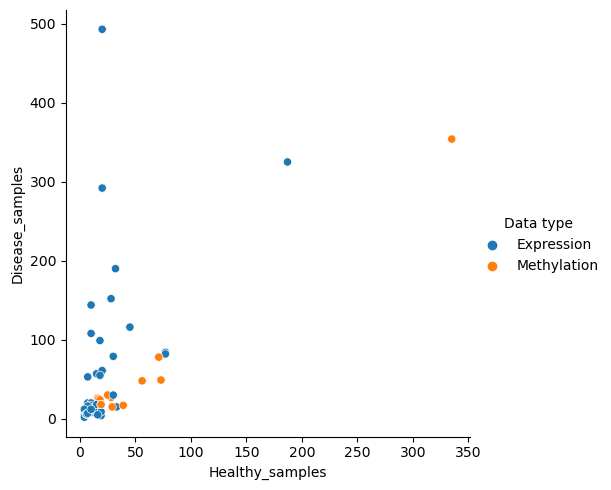

In [15]:
sns.relplot(df,x='Healthy_samples', y='Disease_samples', hue='Data type')

In [16]:
df[categorical_cols].isna().sum()

Disease       0
Tissue        3
Cell_type    23
dtype: int64

In [17]:
df['Cell_type'].fillna("Unknown", inplace=True)

In [18]:
df['Tissue'].fillna("Unknown", inplace=True)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=40)

In [21]:
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=40)

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [23]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [24]:
train_df[encoded_cols] = encoder.transform(train_df[categorical_cols])

In [25]:
val_df[encoded_cols] = encoder.transform(val_df[categorical_cols])

In [26]:
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df[numerical_cols])

In [28]:
df.describe()

,Total_samples,Healthy_samples,Disease_samples
count,82.000000,82.000000,82.000000
mean,68.402439,23.231707,45.170732
std,114.049790,42.793590,83.391802
min,6.000000,4.000000,2.000000
25%,19.250000,7.000000,9.250000
50%,26.000000,12.000000,13.500000
75%,59.000000,19.750000,30.000000
max,689.000000,335.000000,493.000000


In [29]:
scaler.data_max_, scaler.data_min_

(array([689., 335., 493.]), array([6., 4., 2.]))

In [30]:
train_df[numerical_cols] = scaler.transform(train_df[numerical_cols])

In [31]:
val_df[numerical_cols] = scaler.transform(val_df[numerical_cols])

In [32]:
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model = LogisticRegression(solver='liblinear')

In [53]:
model.fit(train_df[numerical_cols.tolist() + encoded_cols], train_df[target_column].values.ravel())

LogisticRegression(solver='liblinear')

In [65]:
weights_df = pd.DataFrame({
    "values": np.append(numerical_cols.tolist() + encoded_cols, "Inercerpt (B)"),
    "slopes": np.append(model.coef_, model.intercept_)
}).sort_values("slopes", ascending=False)
weights_df

,values,slopes
14,Tissue_Unknown,0.869286
34,Cell_type_T cells,0.631102
33,Cell_type_Regulatory T cells,0.592912
1,Healthy_samples,0.529526
27,Cell_type_Naive T cells,0.514148
0,Total_samples,0.388908
4,Disease_SLE,0.338522
31,Cell_type_PBLs,0.269393
24,Cell_type_Monocytes,0.198828
2,Disease_samples,0.184014


In [67]:
train_prediction = model.predict(train_df[numerical_cols.tolist() + encoded_cols])

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_true=train_df[target_column], y_pred=train_prediction)

0.875

In [69]:
test_prediction = model.predict(test_df[numerical_cols.tolist() + encoded_cols])

In [70]:
accuracy_score(y_true=test_df[target_column], y_pred=test_prediction)

0.5294117647058824

In [ ]:
accuracy_score(y_true=test_df[target_column], y_pred=test_prediction)

In [71]:
val_prediction = model.predict(val_df[numerical_cols.tolist() + encoded_cols])

In [72]:
accuracy_score(y_true=val_df[target_column], y_pred=val_prediction)

0.7647058823529411

<Axes: >

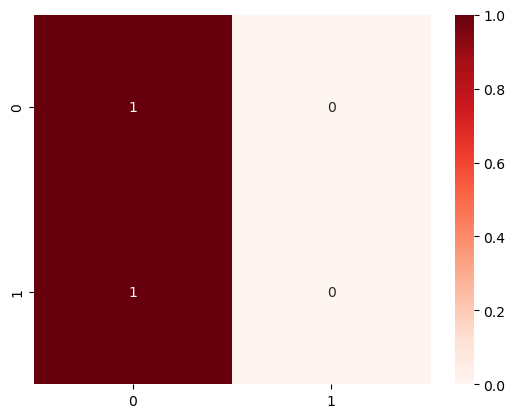

In [77]:
sns.heatmap(confusion_matrix(test_df[target_column], test_prediction, normalize='true'), cmap="Reds", annot=True)

<Axes: >

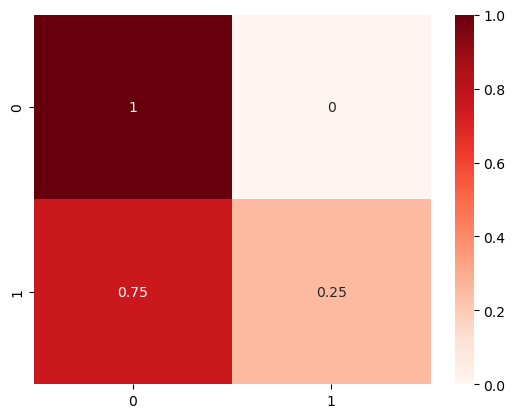

In [78]:
sns.heatmap(confusion_matrix(train_df[target_column], train_prediction, normalize='true'), cmap="Reds", annot=True)

In [87]:
confusion_matrix(y_true=val_df[target_column], y_pred=val_prediction, normalize='true')

array([[1., 0.],
       [1., 0.]])

True     13
False     4
Name: Data type, dtype: int64